<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/RogenJosh/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.backend import clear_session
clear_session()

Data Preprocessing



In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [32]:
#assignig the to validation set
X_valid = X_train[:10000]
y_valid = y_train[:10000]

#reassigning back to training set
X_train = X_train[10000:]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(30000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


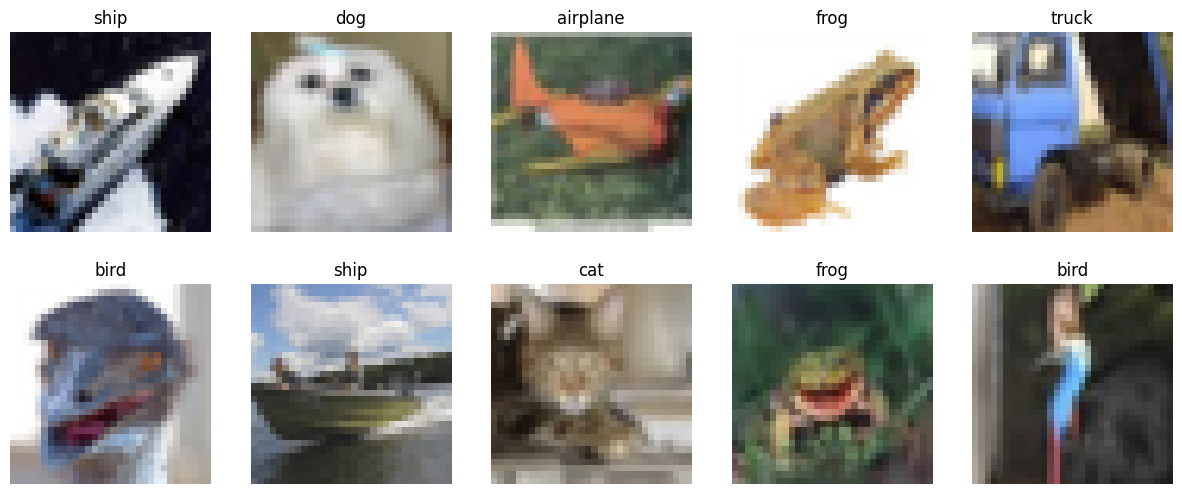

In [33]:
#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Define the class names

# Create a 2 x 5 plot of the first 10 images in the CIFAR-10 dataset
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()


# Plot the first 10 images in the CIFAR-10 dataset
for i in range(10):  # Loop through the first 10 images
    axes[i].imshow(X_train[i])  # Display the image
    class_label = class_names[y_train[i][0]]  # Get the class name for the label
    axes[i].set_title(class_label)  # Set the title of the image
    axes[i].axis('off')  # Turn off the axis

plt.show() # Display the plot


Data Normalization - Agumentation (to be done)


In [34]:
#normalize the data by dividing by 255 to scale the pixel values between 0 and 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_valid = X_train_val.astype('float32') / 255

print('shape of x train normalized', X_train.shape)
print('shape of x test normalized', X_test.shape)
print('shape of x train validation', X_train_val.shape)


shape of x train normalized (30000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [35]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train_val = to_categorical(y_train_val, num_classes=10)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [8]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Data augmentation

In [ ]:
# data augmentation
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1)
    ]
)

Model Architecture

In [6]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model
def cnn_model():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  return model

In [7]:
# create the model
model = cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer= 'sgd',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 50
    BATCH_SIZE:    int = 256

In [10]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_train_val, y_train_val)
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1016 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0952 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1017 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1006 - loss: nan - val_accuracy: 0.1022 - val_loss: nan
Epoch 9/50
157/157 ━━━

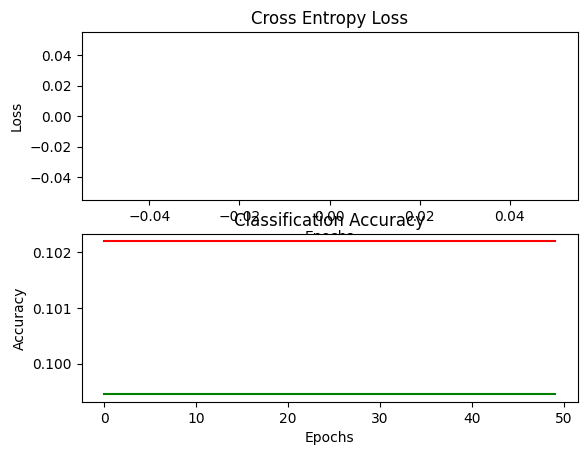

In [23]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


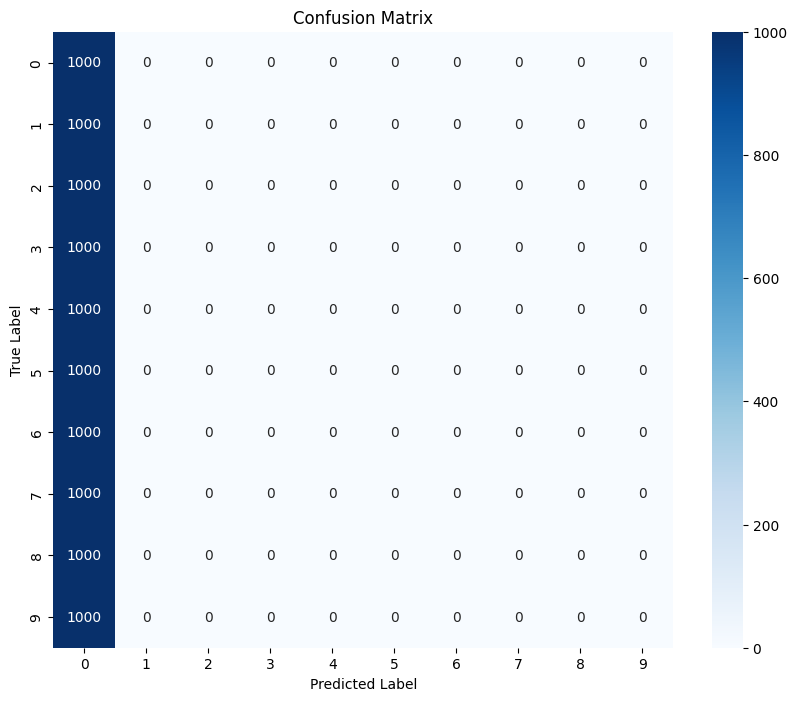

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Text loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: nan
Text loss:  nan
Test accuracy:  0.10000000149011612
